                                                                                     Weijia Yu & Yuxuan Zhang


## Write a short problem statement. What are you asking of the dataset to solve? What domain questions are you trying to answer? Also, please specify the source of the data. 

The goal of this exercise is to cluster countries into different groups based on its socio-economic development, the dataset is substracted from kaggle but the original sources is unknown.

# Data Wrangling

In [68]:
import numpy as np
import pandas as pd
from matplotlib import pylab as plt
from sklearn.cluster import KMeans
import seaborn as sns
sns.set()

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


In [69]:
country= pd.read_csv('country-data.csv')
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [9]:
country.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [11]:
country.duplicated().sum()

0

The dataset doesn't have missing values to be replaced, all the data seems to have unique values

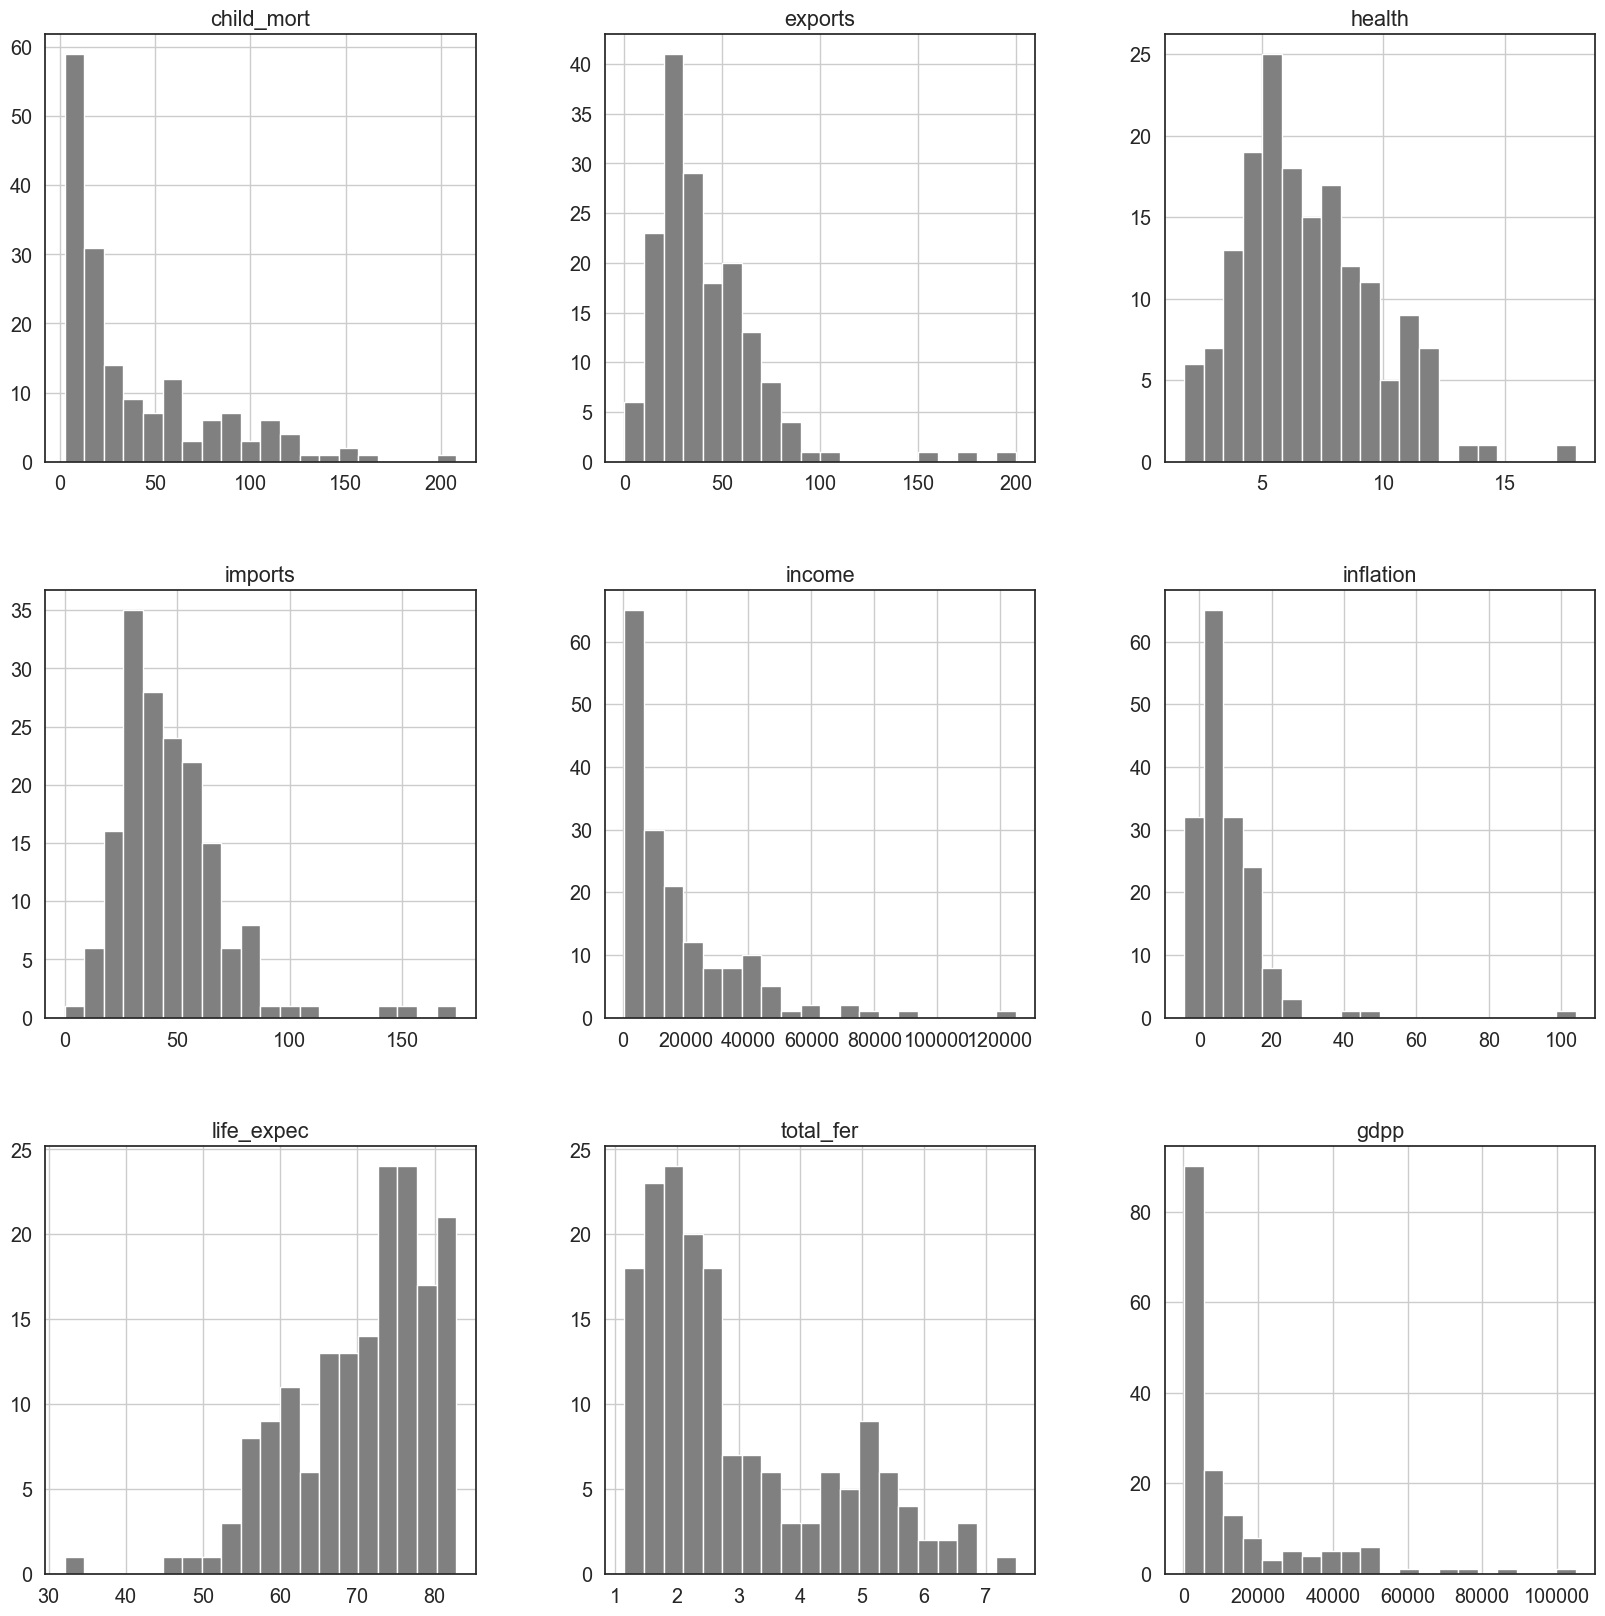

In [16]:
sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(20,20)})
ax=country.hist(bins=20, color='grey')

Most of the graph shows a skewed distribution,  only the columns of imports,exports and health have a slight tendency of normal bell curve distributions. 

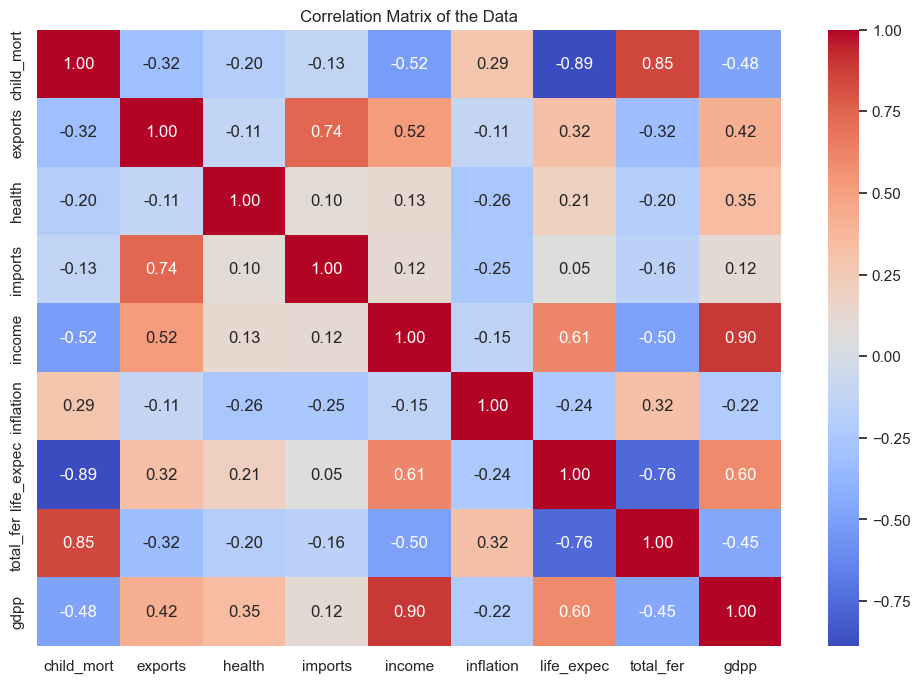

In [19]:
plt.figure(figsize=(12, 8))
corr_matrix = country.corr()
hm = sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')
hm.set_title("Correlation Matrix of the Data")
plt.show()

This heatmap shows the influence & correlation the columns/factors have on each other

# PCA

We want to scale the relevant features and reduce the data to only its relevant feautures, in this session we will explore the method using PCA 

In [73]:
country.drop('country', axis=1, inplace=True)

In [74]:
# SCALE the columns
scaler= StandardScaler()
country_scaled = pd.DataFrame(scaler.fit_transform(country),columns=country.columns)
country_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [75]:
pca=PCA(n_components=country_scaled.shape[1])
country_pca = pca.fit_transform(country_scaled)

In [76]:
cumulative_var_ratio=pca.explained_variance_ratio_.cumsum()
best_n_components=np.argmax(cumulative_var_ratio>=0.90)+1 
print("Best number of components for 90% variance:",best_n_components)

Best number of components for 90% variance: 5


In [85]:
PC5= PCA(n_components=5)
country_pca= PC5.fit_transform(country_scaled)
country_pca
print(PC5.explained_variance_ratio_) # the 5 principle component and its power on the variance 


[0.4595174  0.17181626 0.13004259 0.11053162 0.07340211]


In [87]:
#I want to take a look at how each columns'weights on each principal component
loadings_matrix = pd.DataFrame(PC5.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'], index=country.columns)

# Print loadings matrix
print(loadings_matrix)

                 PC1       PC2       PC3       PC4       PC5
child_mort -0.419519  0.192884 -0.029544  0.370653 -0.168970
exports     0.283897  0.613163  0.144761  0.003091  0.057616
health      0.150838 -0.243087 -0.596632  0.461897  0.518000
imports     0.161482  0.671821 -0.299927 -0.071907  0.255376
income      0.398441  0.022536  0.301548  0.392159 -0.247150
inflation  -0.193173 -0.008404  0.642520  0.150442  0.714869
life_expec  0.425839 -0.222707  0.113919 -0.203797  0.108220
total_fer  -0.403729  0.155233  0.019549  0.378304 -0.135262
gdpp        0.392645 -0.046022  0.122977  0.531995 -0.180167


It looks like for PC1, child mortality, income, and life expectancy have the strongest influence based on their absolute value. PC1, therefore, can be a collection indicating whether a country demonstrates strong/weak performance in these areas.

Same logic with PC2, this component helps later categorizes whether countries demonstrate strong/weak performance based on imports/exports. PC3 health and inflation etc...

# Clustering

We want to use KMeans clustering algorithms to do clustering after performing PCA. We will do a sihouette analysis in order to determine the optimal number of clusters in the data. A high sihouette score will indicates that if the data point is well matched to its own cluster.

For n_clusters = 2, the average silhouette_score is : 0.30442
For n_clusters = 3, the average silhouette_score is : 0.30798
For n_clusters = 4, the average silhouette_score is : 0.32718
For n_clusters = 5, the average silhouette_score is : 0.24765
For n_clusters = 6, the average silhouette_score is : 0.26336
For n_clusters = 7, the average silhouette_score is : 0.28041
For n_clusters = 8, the average silhouette_score is : 0.24799
For n_clusters = 9, the average silhouette_score is : 0.24394
For n_clusters = 10, the average silhouette_score is : 0.26001
For n_clusters = 11, the average silhouette_score is : 0.22977
For n_clusters = 12, the average silhouette_score is : 0.2257
For n_clusters = 13, the average silhouette_score is : 0.22704
For n_clusters = 14, the average silhouette_score is : 0.24323


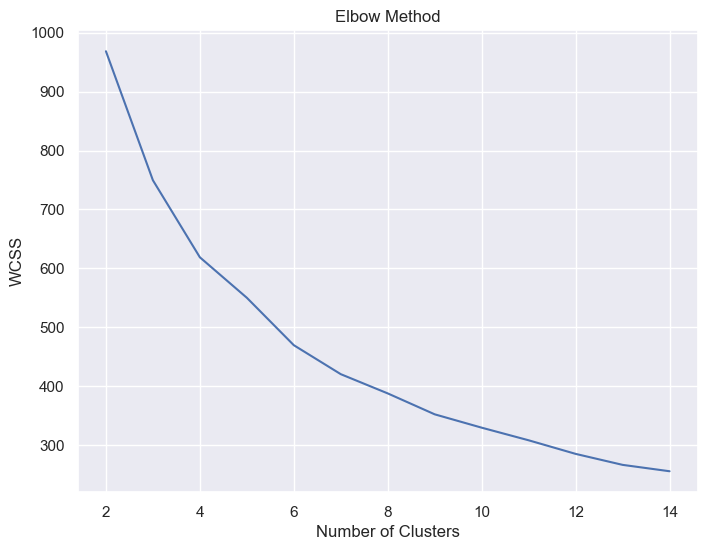

In [78]:
X = country_pca  

WCSS = [] # within-cluster-sum-of-squares, which can be used to determine the optimal number of clusters to use

# fit KMeans clustering for different number of clusters, loop from 2-15
for n_clusters in range(2, 15):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(country_pca)
    WCSS.append(kmeans.inertia_)
    #Predict the cluster for each data point
    preds=kmeans.predict(country_pca)
    
    # Calculate the mean silhouette coefficient for the number of clusters chosen
    score =silhouette_score(country_pca,preds,metric='euclidean')
    print('For n_clusters = {}, the average silhouette_score is : {}'.format(n_clusters,score.round(5)))
    
# plot the WCSS values against number of clusters, graph it 
fig = plt.figure(figsize=(8,6))
plt.plot(range(2,15), WCSS)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

A higher wcss score indicates more spread out clusters, in this case, n_cluster= 4 might be the best bet for us. Then we want to demonstrate the clustering into visualization. 

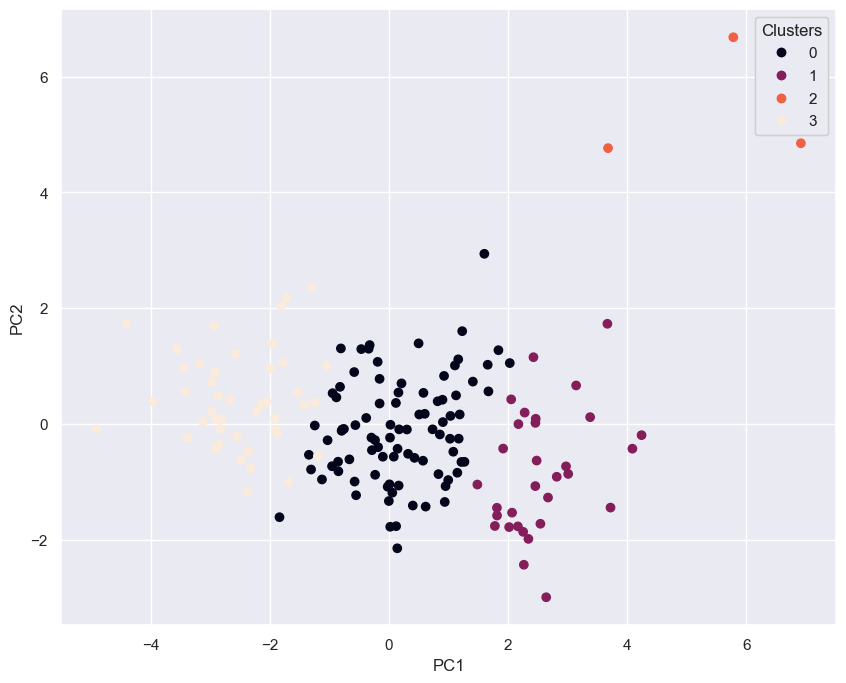

In [79]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(country_pca)

# Predict the cluster labels for each data point
predict = kmeans.predict(country_pca)

# Create a scatter plot 
fig, ax = plt.subplots(figsize=(10,8))

scatter = ax.scatter(country_pca[:,0], country_pca[:,1], c=labels)
ax.set_xlabel('PC1') #first principal component
ax.set_ylabel('PC2')# second principal component 

legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()

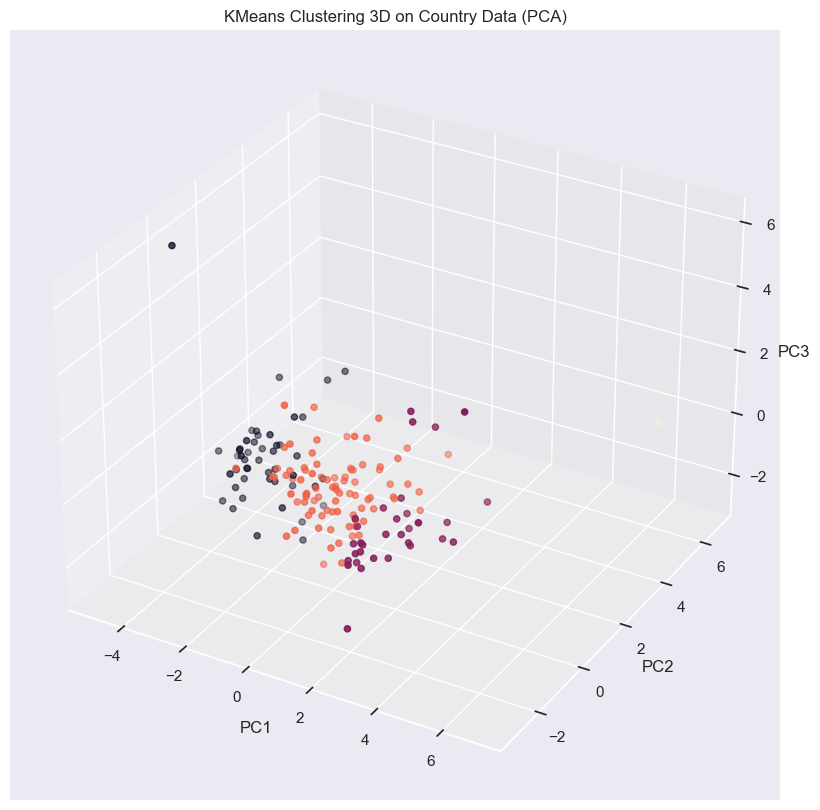

In [80]:
#We also wanted to see it in 3D since there are 4 different cluster 


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# scatter plot of the first three principal components
x = country_pca[:,0]
y = country_pca[:,1]
z = country_pca[:,2]
ax.scatter(x, y, z, c=kmeans.labels_,)

# add labels and title
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('KMeans Clustering 3D on Country Data (PCA)')
plt.show()


Next, we want to assign countries to each cluster, each country besides their original data points from the original dataset will be assigned to 0,1,2,3 clusters based on attributes from other columns. Notice that the non-numeric value country name is dropped for quantitive analysis purposes

In [54]:
# Predict the cluster labels
labels = kmeans.predict(country_pca)

# Concatenate the original dataframe with the predicted labels
country_clustered = pd.concat([country, pd.DataFrame({'Cluster': labels})], axis=1)

print(country_clustered.head(10))

   child_mort  exports  health  imports  income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9    1610      9.440        56.2   
1        16.6     28.0    6.55     48.6    9930      4.490        76.3   
2        27.3     38.4    4.17     31.4   12900     16.100        76.5   
3       119.0     62.3    2.85     42.9    5900     22.400        60.1   
4        10.3     45.5    6.03     58.9   19100      1.440        76.8   
5        14.5     18.9    8.10     16.0   18700     20.900        75.8   
6        18.1     20.8    4.40     45.3    6700      7.770        73.3   
7         4.8     19.8    8.73     20.9   41400      1.160        82.0   
8         4.3     51.3   11.00     47.8   43200      0.873        80.5   
9        39.2     54.3    5.88     20.7   16000     13.800        69.1   

   total_fer   gdpp  Cluster  
0       5.82    553        3  
1       1.65   4090        0  
2       2.89   4460        0  
3       6.16   3530        3  
4       2.13  12200        0  

Then, we want to look at what columns influenced the clustering decision the most, therefore we are going to perform a groupby function for each cluster to calculate the mean for each variable. 

In [81]:
cluster_means = country_clustered.groupby('Cluster').mean()
cluster_means

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Cluster,,,,,,,,,
0,22.123864,41.014648,6.265341,47.748476,12795.113636,7.635466,72.638636,2.327955,6738.772727
1,4.903226,46.477419,9.127097,40.483871,44703.225806,2.607613,80.283871,1.786129,42574.193548
2,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667
3,95.106667,28.602444,6.301111,42.306667,3539.844444,11.986778,59.055556,5.065333,1766.711111


In [67]:
cluster_2=[]
cluster_3=[]
for i in country_clustered[country_clustered['Cluster']==2].index:
    cluster_2.append(i)
for x in country_clustered[country_clustered['Cluster']==3].index:
    cluster_3.append(x)



[91, 98, 133]

In [71]:
cluster2country = country.iloc[cluster_2] 
cluster2country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600


In [88]:
cluster3country = country.iloc[cluster_3] 
cluster3country

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553
3,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530
17,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758
25,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575
26,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231
28,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310
31,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446
32,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897
36,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769
37,116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334


print the according country name for cluster 2, looks like they are all commonly known as developed countries. Have a trend of low morality, high exports, high life expectancy, and high GDP. The same logic goes to cluster 3 country names, a lot of them are African countries with stereotypes of being less developed

# Summary

When one variable has higher mean values it can influence the K-means algorithm and therefore lead to clustered bias based on that variable. based on these findings, we can say cluster 2(third cluster) stands out extremely because of its income and life_expec, therefore a potential match with the commonly accepted concept of "developed country." whereas cluster 3(last cluster) has the highest child mortality and least life_expec rate, which can match with the commonly accepted concept of "developing country". However it excludes groups 1 and 0, therefore this interpretation is underdeveloped.

With the visualization above, as datapoints lean towards PC1 /PC2, meaning the country has stronger performance and is more easily categorized as more developed/advanced, you can see cluster 2 matches with this hypothesis and cluster 3 as well. with the other 2 in between.